In [1]:
DATA_DIR = "../data/laks"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_clone_snvs = pd.read_csv(f"{DATA_DIR}/ov2295_clone_snvs.csv.gz", low_memory=False)
df_clone_snvs

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom
0,1,985349,G,A,A,18,0,18,0,0,0
1,1,985349,G,A,B,19,0,19,0,0,0
2,1,985349,G,A,C,14,0,14,0,0,0
3,1,985349,G,A,D,18,0,18,0,0,0
4,1,985349,G,A,E,6,10,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0
126608,X,154563943,T,A,F,0,10,14,1,1,0
126609,X,154563943,T,A,G,22,0,22,0,0,0
126610,X,154563943,T,A,H,10,0,10,0,0,0


In [4]:
df_clone_cn = pd.read_csv(f"{DATA_DIR}/ov2295_clone_cn.csv.gz")
df_clone_cn

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [5]:
df_clone_cn["cn"] = df_clone_cn["copy"].fillna(df_clone_cn["total_cn"])

In [6]:
# All bins are of the same size
print((df_clone_cn["end"] - df_clone_cn["start"] + 1).unique())

bin_size = (df_clone_cn["end"] - df_clone_cn["start"] + 1).unique()[0]

[500000]


In [7]:
df_clone_snvs["bin_start"] = df_clone_snvs["coord"] // bin_size * bin_size + 1
df_clone_snvs_cn = pd.merge(
    df_clone_snvs,
    df_clone_cn,
    left_on=["clone_id", "chrom", "bin_start"],
    right_on=["clone_id", "chr", "start"],
    how='left',
)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn,cn
0,1,985349,G,A,A,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,2.000000
1,1,985349,G,A,B,19,0,19,0,0,0,500001,1,500001,1000000,NaN,2,0,2,2.000000
2,1,985349,G,A,C,14,0,14,0,0,0,500001,1,500001,1000000,NaN,2,0,2,2.000000
3,1,985349,G,A,D,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,2.000000
4,1,985349,G,A,E,6,10,23,1,1,0,500001,1,500001,1000000,NaN,4,0,4,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,154500001,X,154500001,155000000,1.604020,2,0,2,1.604020
126608,X,154563943,T,A,F,0,10,14,1,1,0,154500001,X,154500001,155000000,1.573432,2,0,2,1.573432
126609,X,154563943,T,A,G,22,0,22,0,0,0,154500001,X,154500001,155000000,1.524319,2,0,2,1.524319
126610,X,154563943,T,A,H,10,0,10,0,0,0,154500001,X,154500001,155000000,1.551737,2,0,2,1.551737


## Pooling

In [8]:
from sklearn.cluster import SpectralBiclustering

In [9]:
df = df_clone_snvs_cn
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"].astype(str) + ":" + df["alt"].astype(str)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,...,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn,cn,mutation
0,1,985349,G,A,A,18,0,18,0,0,...,500001,1,500001,1000000,NaN,2,0,2,2.000000,1:985349:G:A
1,1,985349,G,A,B,19,0,19,0,0,...,500001,1,500001,1000000,NaN,2,0,2,2.000000,1:985349:G:A
2,1,985349,G,A,C,14,0,14,0,0,...,500001,1,500001,1000000,NaN,2,0,2,2.000000,1:985349:G:A
3,1,985349,G,A,D,18,0,18,0,0,...,500001,1,500001,1000000,NaN,2,0,2,2.000000,1:985349:G:A
4,1,985349,G,A,E,6,10,23,1,1,...,500001,1,500001,1000000,NaN,4,0,4,4.000000,1:985349:G:A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,...,154500001,X,154500001,155000000,1.604020,2,0,2,1.604020,X:154563943:T:A
126608,X,154563943,T,A,F,0,10,14,1,1,...,154500001,X,154500001,155000000,1.573432,2,0,2,1.573432,X:154563943:T:A
126609,X,154563943,T,A,G,22,0,22,0,0,...,154500001,X,154500001,155000000,1.524319,2,0,2,1.524319,X:154563943:T:A
126610,X,154563943,T,A,H,10,0,10,0,0,...,154500001,X,154500001,155000000,1.551737,2,0,2,1.551737,X:154563943:T:A


In [10]:
total_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='total_counts',
    aggfunc='sum',
    fill_value=0
)
total_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,10,21,5,24,24,6,24,24,14,5,...,8,11,6,23,7,11,8,1,20,3
B,6,13,7,16,30,5,9,10,12,6,...,7,12,7,5,3,9,6,3,8,9
C,13,11,6,8,23,4,15,15,5,5,...,6,12,4,8,4,11,5,4,6,10
D,13,15,5,26,36,10,19,19,11,9,...,4,8,8,7,18,20,8,7,12,7
E,27,35,27,51,54,26,64,64,66,22,...,15,26,21,18,30,27,13,21,20,28
F,16,18,15,30,24,21,31,31,29,12,...,11,12,2,16,12,8,7,13,7,12
G,18,16,16,42,45,23,38,38,52,10,...,12,12,9,13,20,19,7,17,11,22
H,14,18,16,22,20,13,23,23,21,13,...,13,5,8,6,5,11,8,10,7,5
I,24,19,19,32,26,21,31,32,30,14,...,13,18,7,10,23,8,8,9,10,10


In [11]:
alt_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='alt_counts',
    aggfunc='sum',
    fill_value=0
)
alt_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0,0,5,0,10,0,0,0,0,5,...,0,0,0,10,7,0,0,1,0,0
B,0,0,7,0,10,0,0,0,0,6,...,0,0,0,4,3,0,0,3,0,0
C,0,0,6,0,0,0,1,0,0,5,...,0,0,0,0,4,0,5,4,0,0
D,0,0,5,0,0,0,0,0,0,9,...,0,0,0,0,10,0,8,7,0,0
E,10,10,9,10,0,7,10,10,10,10,...,0,10,1,0,10,0,0,10,10,0
F,4,10,10,10,0,1,10,10,0,5,...,0,0,0,0,10,0,0,10,7,0
G,0,0,7,0,0,0,0,0,0,3,...,10,0,9,0,10,8,0,10,0,10
H,0,0,9,0,0,0,1,0,0,8,...,10,0,8,0,5,5,0,10,0,5
I,0,0,10,0,0,0,0,0,0,7,...,10,0,7,0,10,1,0,9,0,10


In [12]:
ref_table = total_table - alt_table

In [13]:
vaf_table = alt_table.div(total_table).replace(np.nan, 0)
vaf_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.00000,0.000000,1.000000,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.00000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,0.37037,0.285714,0.333333,0.196078,0.000000,0.269231,0.156250,0.156250,0.151515,0.454545,...,0.000000,0.384615,0.047619,0.000000,0.333333,0.000000,0.0,0.476190,0.5,0.000000
F,0.25000,0.555556,0.666667,0.333333,0.000000,0.047619,0.322581,0.322581,0.000000,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.0,0.769231,1.0,0.000000
G,0.00000,0.000000,0.437500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.833333,0.000000,1.000000,0.000000,0.500000,0.421053,0.0,0.588235,0.0,0.454545
H,0.00000,0.000000,0.562500,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.615385,...,0.769231,0.000000,1.000000,0.000000,1.000000,0.454545,0.0,1.000000,0.0,1.000000
I,0.00000,0.000000,0.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.769231,0.000000,1.000000,0.000000,0.434783,0.125000,0.0,1.000000,0.0,1.000000


In [14]:
copy_number_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='cn',
    aggfunc='mean',
    fill_value=0
)
copy_number_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,1.086423,1.086423,1.086423,1.086423,2.010971,1.029293,1.056376,1.056376,1.056376,1.039202,...,1.029618,1.029618,0.995145,0.995145,1.026155,1.026155,1.026155,1.012964,1.006697,1.043818
B,1.100137,1.100137,1.100137,1.100137,2.836462,1.070089,1.090267,1.090267,1.090267,1.073743,...,1.087534,1.087534,1.008453,1.008453,1.082851,1.082851,1.082851,1.058043,1.063438,1.096134
C,1.045324,1.045324,1.045324,1.045324,2.345911,0.991433,1.015720,1.015720,1.015720,1.015604,...,1.001887,1.001887,0.955438,0.955438,0.976732,0.976732,0.976732,0.994265,0.974980,0.982097
D,1.103072,1.103072,1.103072,1.103072,3.000404,1.054511,1.093049,1.093049,1.093049,1.051490,...,1.007824,1.007824,0.942027,0.942027,1.002994,1.002994,1.002994,1.009555,0.984034,1.033465
E,4.140129,4.140129,4.140129,4.140129,4.209501,4.009410,4.010381,4.010381,4.010381,3.872607,...,2.146698,2.146698,2.030972,2.030972,2.092819,2.092819,2.092819,2.122751,2.098275,2.076371
F,4.091537,4.091537,4.091537,4.091537,4.402873,3.992338,3.997164,3.997164,3.997164,3.881653,...,2.102026,2.102026,2.014899,2.014899,2.053071,2.053071,2.053071,2.124626,2.149400,2.066342
G,3.975073,3.975073,3.975073,3.975073,4.047369,3.772970,3.820026,3.820026,3.820026,3.733012,...,2.029860,2.029860,1.976048,1.976048,2.048260,2.048260,2.048260,2.034785,2.007975,2.001689
H,4.115069,4.115069,4.115069,4.115069,4.179742,3.900205,3.962328,3.962328,3.962328,3.839881,...,2.102348,2.102348,2.033606,2.033606,2.079424,2.079424,2.079424,2.107333,2.087176,2.019542
I,4.012326,4.012326,4.012326,4.012326,3.941668,3.747548,3.838794,3.838794,3.838794,3.718452,...,2.060219,2.060219,2.009352,2.009352,2.076775,2.076775,2.076775,2.099473,2.068405,2.044969


In [15]:
F = (vaf_table * copy_number_table).clip(upper=1)
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.00000,0.837905,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.432672,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.00000,0.945487,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.806763,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.00000,0.000000,0.000000,0.067715,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.976732,0.000000,0.976732,0.994265,0.0,0.000000
D,0.0,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.557219,0.000000,1.000000,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.81179,0.000000,1.000000,0.626622,0.626622,0.607633,1.0,...,0.0,0.825653,0.096713,0.000000,0.697606,0.000000,0.000000,1.000000,1.0,0.000000
F,1.0,1.0,1.0,1.00000,0.000000,0.190111,1.000000,1.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.862425,0.000000,1.000000,0.0,0.909859
H,0.0,0.0,1.0,0.00000,0.000000,0.000000,0.172275,0.000000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.945193,0.000000,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.902946,0.259597,0.000000,1.000000,0.0,1.000000


In [16]:
thres = 0.05 * 9
sums = np.sum(F.to_numpy(), axis=0)
int(np.count_nonzero(sums >= F.shape[0] - thres))

677

10
12
14
16
18
20


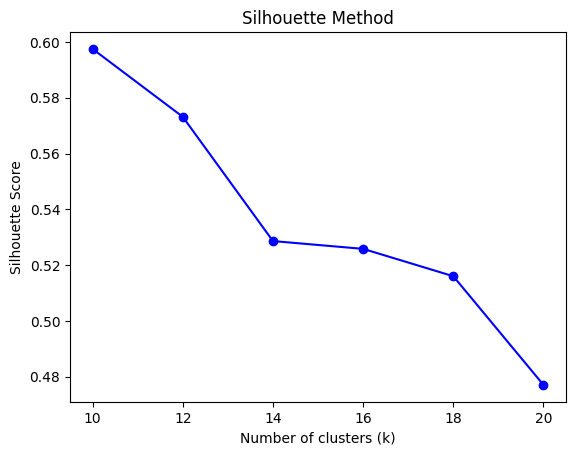

In [17]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


X = F.T.to_numpy()

sil_scores = []
ranges = range(10, 22, 2)

lowest_sil = np.inf
best_labels = None
for k in ranges:
    print(k)
    sils = []
    for i in range(10):
        kmeans = KMeans(n_clusters=k, random_state=i * 100)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        sils.append(score)

        if score < lowest_sil:
            lowest_sil = score
            best_labels = labels
    sil_scores.append(np.min(sils))

plt.plot(ranges, sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()



In [18]:
# X = F.T.to_numpy()

# kmeans = KMeans(n_clusters=55, random_state=100)
# labels = kmeans.fit_predict(X)

# labels

In [19]:
for i in range(np.max(best_labels) + 1):
    print(i, len(best_labels[best_labels == i]))

0 348
1 216
2 2708
3 2377
4 669
5 746
6 1456
7 267
8 585
9 111
10 135
11 331
12 329
13 1172
14 134
15 487
16 281
17 232
18 946
19 538


In [186]:
# centroids = kmeans.cluster_centers_
# centroids.shape

In [20]:
quantile = 0.95

In [21]:
Fn = F.to_numpy()

pos_labels = []

for i in range(np.max(best_labels) + 1):
    indices = np.where(best_labels == i)[0]

    Fnl = Fn[:, indices]

    Fplus = []
    Fminus = []
    for idx in range(Fnl.shape[0]):
        sorted_fracs = np.sort(Fnl[idx,:])
        Fplus.append(sorted_fracs[int(Fnl.shape[1]*quantile) - 1])
        Fminus.append(sorted_fracs[int(Fnl.shape[1]*(1 - quantile)) + 1])
        # Fplus.append(np.max(Fnl[idx,:]))
    # Fnl = np.sort(Fnl, axis=1)
    # i = int(Fnl.shape[1] * quantile)

    # quantiles = Fnl[:, i]

    if np.sum(Fplus) == 9:
        pos_labels.append(i)
        print(Fminus)
    
    # sum_quantiles = np.sum(quantiles)
    
    # if sum_quantiles == 9:
    #     pos_labels.append(label)

print(pos_labels)

    

[np.float64(0.6205464235247152), np.float64(0.6437410209970549), np.float64(0.6560988396353157), np.float64(0.6585869317970559), np.float64(0.7062677676810388), np.float64(1.0), np.float64(0.8233284139456712), np.float64(0.7385746378067238), np.float64(0.9029456105529464)]
[np.float64(0.3785594166207989), np.float64(0.5584710033903417), np.float64(0.26406361670086054), np.float64(0.32939920377185644), np.float64(0.5645205980270414), np.float64(0.9780138721730119), np.float64(0.6651378567702607), np.float64(0.7596540778100661), np.float64(0.7554719163917585)]
[6, 13]


In [22]:
# thres = 0.05
# lower_threshold = thres
# upper_threshold = 1 - thres

# centroids[centroids < lower_threshold] = 0
# centroids[centroids > upper_threshold] = 1

# all_one_centroids = centroids[np.all(centroids >= 0.99, axis=1)]
# all_one_indices = np.where(np.all(centroids >= upper_threshold, axis=1))[0]
# all_one_indices

In [23]:
labels = best_labels
len(labels[labels == 6]) + len(labels[labels == 13])

2628

In [38]:
all_mutations = list(F.T.index)
all_mutations

['10:100129846:C:A',
 '10:100185101:A:G',
 '10:100209326:T:C',
 '10:100283942:C:T',
 '10:10086005:G:T',
 '10:100873589:A:T',
 '10:101108222:C:A',
 '10:101108223:T:C',
 '10:101427318:G:C',
 '10:101884473:T:A',
 '10:101907279:T:C',
 '10:101943824:C:G',
 '10:102073603:A:G',
 '10:102329766:C:A',
 '10:102390772:G:A',
 '10:10264022:C:A',
 '10:102941557:G:T',
 '10:103180511:A:T',
 '10:104152330:G:C',
 '10:104189406:G:A',
 '10:104288786:T:C',
 '10:104424339:T:G',
 '10:104539644:A:T',
 '10:104560294:G:C',
 '10:104762063:G:T',
 '10:10480233:A:G',
 '10:105451574:T:G',
 '10:105546988:C:A',
 '10:10576117:A:T',
 '10:105930452:C:G',
 '10:106712620:T:A',
 '10:106777373:A:T',
 '10:106777374:G:T',
 '10:10680991:T:C',
 '10:106888301:T:A',
 '10:106909866:T:A',
 '10:106923383:G:T',
 '10:106925242:C:T',
 '10:106938679:G:C',
 '10:106948639:T:C',
 '10:107018036:C:T',
 '10:107019551:G:A',
 '10:107124237:T:A',
 '10:107190989:T:C',
 '10:107341128:C:T',
 '10:107504036:G:A',
 '10:107625987:T:C',
 '10:108059464:A:G

In [39]:
root_indices = list(np.where(labels == 6)[0]) + list(np.where(labels == 13)[0])
root_mutations = F.columns[root_indices].tolist()
root_mutations = set(root_mutations)

In [41]:
is_in_root = [1 if m in root_mutations else 0 for m in all_mutations]
is_in_root

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [44]:
f_plus_root = pd.DataFrame({
    "mutation": all_mutations,
    "F(+)": is_in_root
})
f_plus_root.to_csv("../outputs/f_plus_roots.csv")
f_plus_root

,mutation,F(+)
0,10:100129846:C:A,0
1,10:100185101:A:G,0
2,10:100209326:T:C,1
3,10:100283942:C:T,0
4,10:10086005:G:T,0
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,0
14065,X:98700894:C:T,1
14066,X:99136386:C:T,0


In [61]:
len(labels == all_one_indices[0])

14068

In [16]:
is_subclonal = (F > 0) & (F < 1)

subclonal_counts = is_subclonal.sum(axis=0)

subclonal_counts

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:98278474:C:A      3
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 14068, dtype: int64

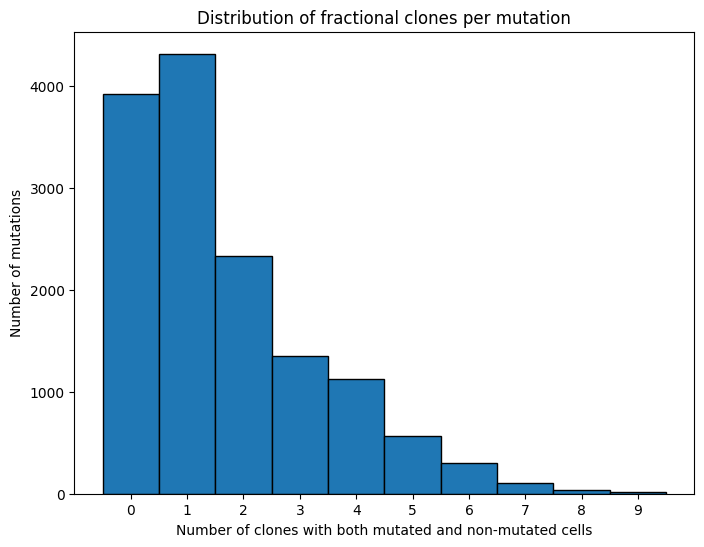

In [15]:
plt.figure(figsize=(8,6))
plt.hist(subclonal_counts, bins=range(subclonal_counts.max()+2), edgecolor="black", align="left")
plt.xlabel("Number of clones with both mutated and non-mutated cells")
plt.ylabel("Number of mutations")
plt.title("Distribution of fractional clones per mutation")
plt.xticks(range(subclonal_counts.max()+1))
plt.show()

In [16]:
distribution_of_subclonal_value_counts = subclonal_counts.value_counts().sort_index()
distribution_of_subclonal_value_counts

0    3921
1    4315
2    2331
3    1347
4    1128
5     569
6     302
7     109
8      32
9      14
Name: count, dtype: int64

In [38]:
is_mutation_with_atmost_1_subclonal_cluster = subclonal_counts[subclonal_counts <= 1]
is_mutation_with_atmost_1_subclonal_cluster

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:97564955:T:C      1
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 8236, dtype: int64

In [39]:
mutations_to_keep = is_mutation_with_atmost_1_subclonal_cluster.index
F_cononical = F.loc[:, F.columns.isin(mutations_to_keep)]
F_cononical

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,10:102329766:C:A,...,X:94344991:T:G,X:96387929:A:T,X:96987846:A:C,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625,0.606061,1.0,1.0,...,1.0,0.0,0.933333,0.0,0.769231,0.095238,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000,0.000000,1.0,1.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000


In [58]:
from sklearn.cluster import SpectralBiclustering
import numpy as np
import seaborn as sns


def plot_spectral_clustering(F, n_clusters=9):
    model = SpectralBiclustering(n_clusters=n_clusters, method='log', random_state=0)
    model.fit(F.values)

    frac_biclust = F.iloc[np.argsort(model.row_labels_)]
    frac_biclust = frac_biclust.iloc[:, np.argsort(model.column_labels_)]

    sns.heatmap(frac_biclust, cmap='coolwarm')

    # Get where the cluster boundaries are
    row_order = np.argsort(model.row_labels_)
    col_order = np.argsort(model.column_labels_)

    row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
    col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

    row_lines = np.cumsum(row_counts)[:-1]
    col_lines = np.cumsum(col_counts)[:-1]

    # Plot with boundaries
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)

    # Draw horizontal lines
    for r in row_lines:
        ax.axhline(r, color='white', lw=2)

    # Draw vertical lines
    for c in col_lines:
        ax.axvline(c, color='white', lw=2)

    plt.title("Spectral Biclustering of CF")
    plt.xlabel("Mutations")
    plt.ylabel("CN Cluster IDs")
    plt.show()

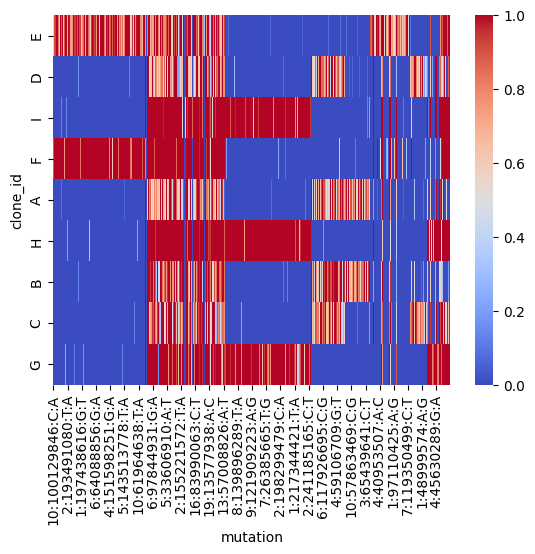

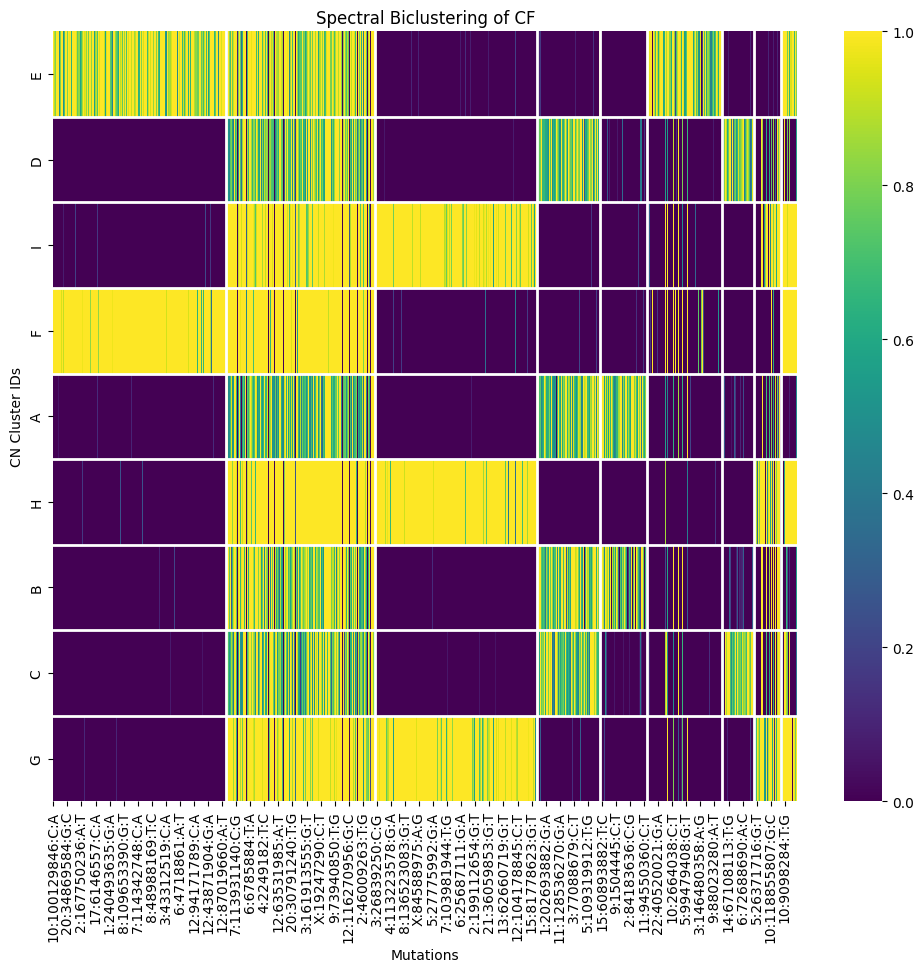

In [59]:
plot_spectral_clustering(F)

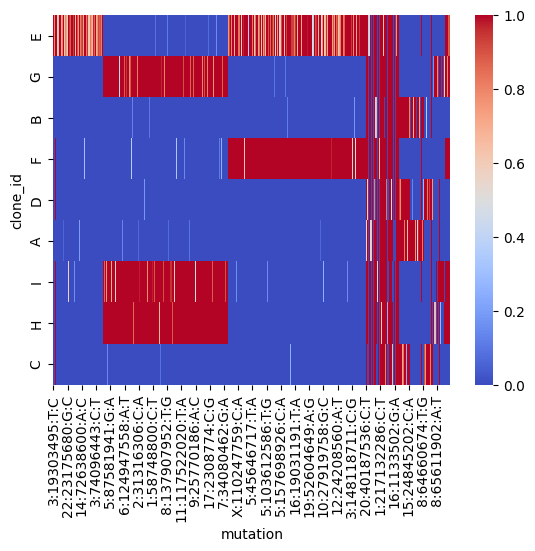

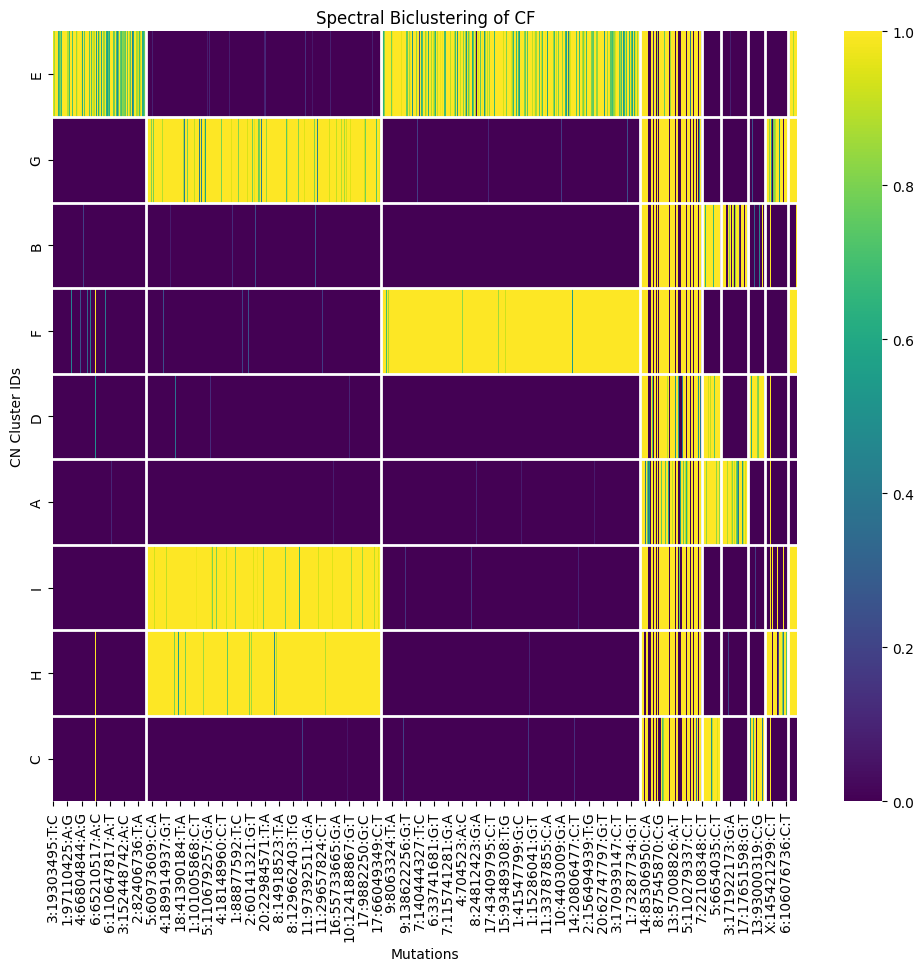

In [60]:
plot_spectral_clustering(F_cononical)

In [61]:
threshold = 1
F_binarized = (F_cononical >=threshold).astype(int)
F_binarized

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,10:102329766:C:A,...,X:94344991:T:G,X:96387929:A:T,X:96987846:A:C,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
B,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
C,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
D,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
E,1,1,1,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
F,1,1,1,1,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0
G,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,0,0
H,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,0,1
I,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,0,1


In [64]:
arr = F_binarized.to_numpy()
mask = ~(arr == 0).all(axis=0)
F_binarized_nonzeros = F_binarized.loc[:, mask]

In [62]:
F_bin_np = F_binarized.to_numpy().T
unique_cols, counts = np.unique(F_bin_np, axis=0, return_counts=True)
sorted_indices = np.argsort(counts)[::-1]
unique_cols = unique_cols[sorted_indices]
counts = counts[sorted_indices]
unique_cols[:10], counts[:10]

(array([[0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([1912, 1411, 1370,  917,  447,  377,  276,  172,  138,  121]))

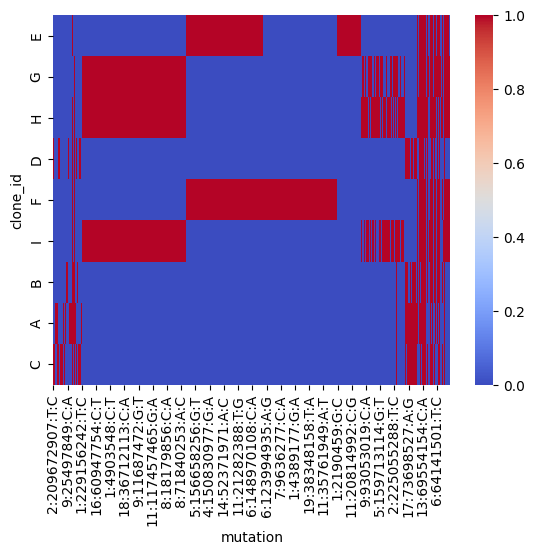

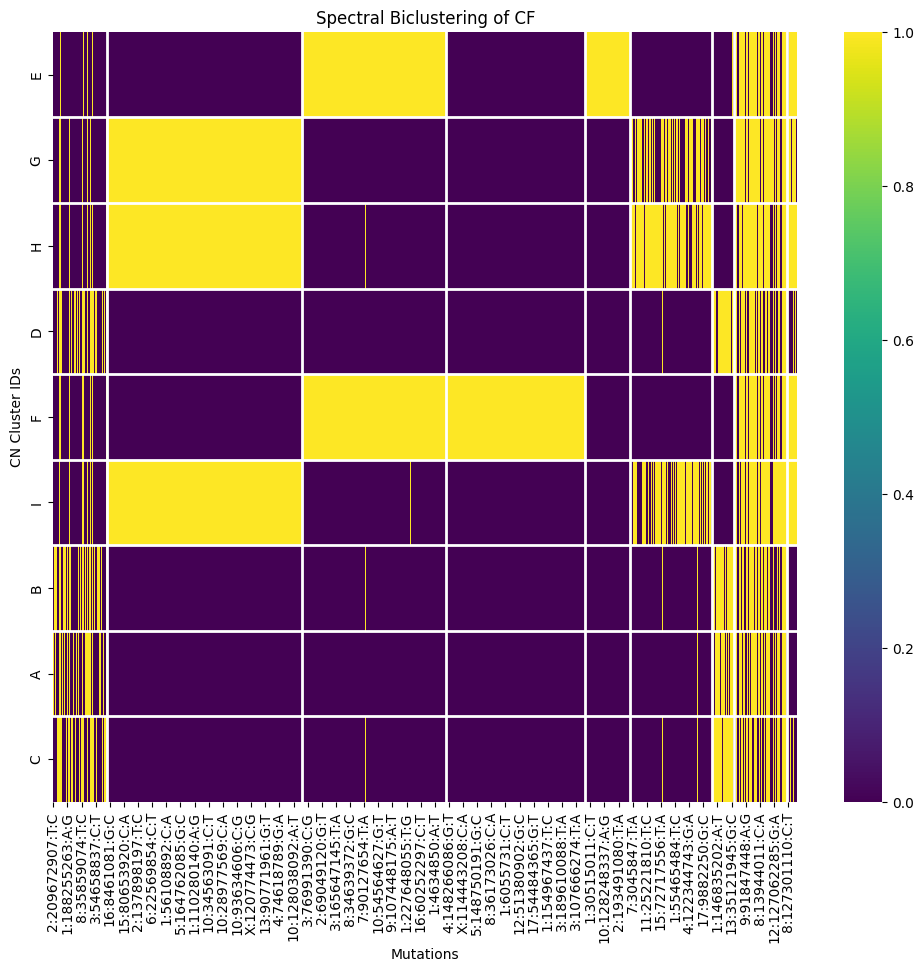

In [65]:
plot_spectral_clustering(F_binarized_nonzeros, n_clusters=9)

In [99]:
from sklearn.cluster import SpectralBiclustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_spectral_clustering_with_character(F, n_clusters=9, density_threshold=0.5):
    model = SpectralBiclustering(n_clusters=n_clusters, method='log', random_state=0)
    model.fit(F.values)

    # Reorder the dataframe by clusters
    row_order = np.argsort(model.row_labels_)
    col_order = np.argsort(model.column_labels_)
    frac_biclust = F.iloc[row_order, :]
    frac_biclust = frac_biclust.iloc[:, col_order]

    # Plot heatmap with boundaries
    row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
    col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

    row_lines = np.cumsum(row_counts)[:-1]
    col_lines = np.cumsum(col_counts)[:-1]

    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)
    for r in row_lines:
        ax.axhline(r, color='white', lw=2)
    for c in col_lines:
        ax.axvline(c, color='white', lw=2)
    plt.title("Spectral Biclustering of CF")
    plt.xlabel("Mutations")
    plt.ylabel("CN Cluster IDs")
    plt.show()

    # --- Create cluster x cluster density matrix ---
    cluster_matrix = np.zeros((n_clusters, n_clusters), dtype=int)
    
    for i in range(n_clusters):
        for j in range(n_clusters):
            # Get rows and columns belonging to cluster i and j
            rows = np.where(model.row_labels_ == i)[0]
            cols = np.where(model.column_labels_ == j)[0]

            # Extract the submatrix
            submatrix = F.values[np.ix_(rows, cols)]
            
            # Calculate density (fraction of non-zero / True entries)
            density = np.mean(submatrix != 0)
            
            # Assign 1 if density > threshold
            if density > density_threshold:
                cluster_matrix[i, j] = 1

    cluster_df = pd.DataFrame(cluster_matrix, 
                              index=F.index[row_order],
                              columns=[f"Mutation_Group_{j}" for j in range(n_clusters)])
    
    return cluster_df, col_counts


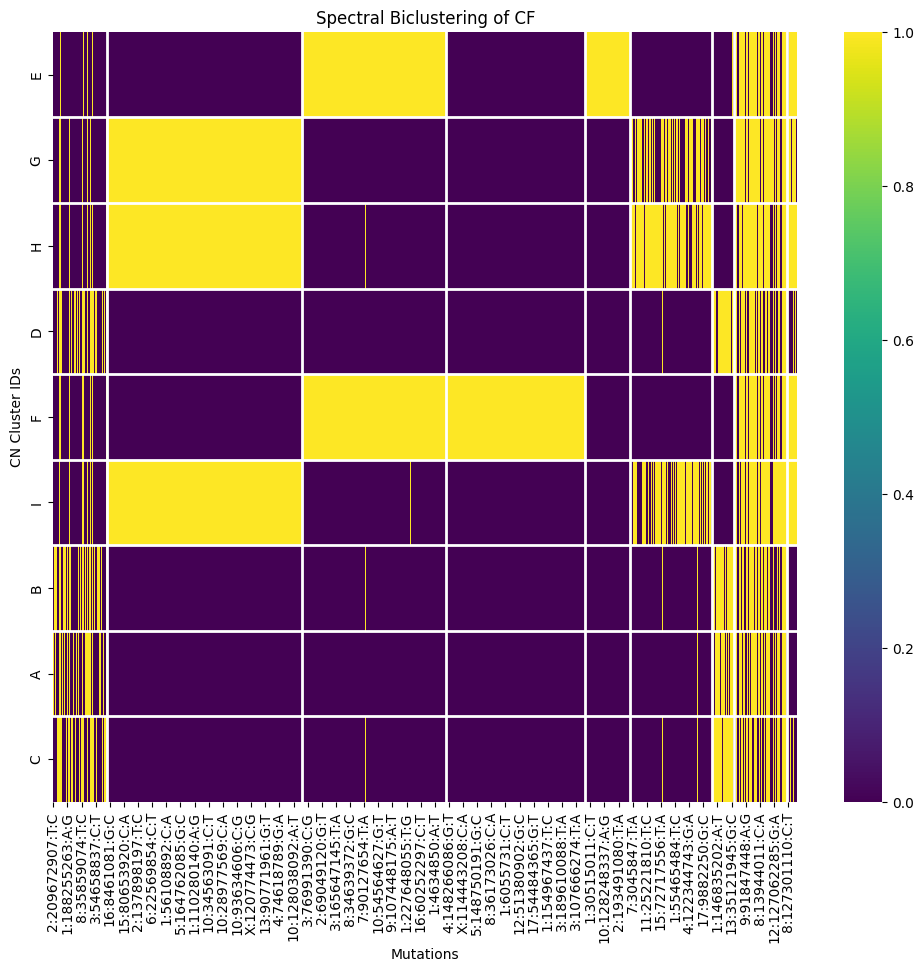

In [204]:
B, mut_counts = plot_spectral_clustering_with_character(F_binarized_nonzeros, density_threshold=0.5)

In [205]:
mut_counts

array([ 530, 1912, 1419, 1370,  447,  806,  216,  520,   99])

In [206]:
B

,Mutation_Group_0,Mutation_Group_1,Mutation_Group_2,Mutation_Group_3,Mutation_Group_4,Mutation_Group_5,Mutation_Group_6,Mutation_Group_7,Mutation_Group_8
clone_id,,,,,,,,,
E,0,0,1,0,1,0,0,1,1
G,0,1,0,0,0,1,0,1,1
H,0,1,0,0,0,1,0,1,1
D,0,0,0,0,0,0,1,1,0
F,0,0,1,1,0,0,0,1,1
I,0,1,0,0,0,1,0,1,1
B,0,0,0,0,0,0,1,1,0
A,1,0,0,0,0,0,1,1,0
C,0,0,0,0,0,0,1,1,0


In [207]:
import numpy as np
from itertools import combinations

def check_perfect_phylogeny_np(arr: np.ndarray) -> bool:
    """
    Check if a binary NumPy matrix admits a perfect phylogeny.
    
    Parameters:
        arr (np.ndarray): 2D binary array (rows = taxa, columns = characters)
        
    Returns:
        bool: True if perfect phylogeny exists, False otherwise
    """
    n_cols = arr.shape[1]
    
    for col1, col2 in combinations(range(n_cols), 2):
        # Extract the two columns
        pair = arr[:, [col1, col2]]
        
        # Find unique row patterns for this column pair
        unique_patterns = np.unique(pair, axis=0)
        
        # Check if all four combinations {00,01,10,11} exist
        if unique_patterns.shape[0] == 4:
            print(f"Conflict found between columns {col1} and {col2}")
            return False
    return True


In [208]:
check_perfect_phylogeny_np(B.to_numpy())

True

In [209]:
B

,Mutation_Group_0,Mutation_Group_1,Mutation_Group_2,Mutation_Group_3,Mutation_Group_4,Mutation_Group_5,Mutation_Group_6,Mutation_Group_7,Mutation_Group_8
clone_id,,,,,,,,,
E,0,0,1,0,1,0,0,1,1
G,0,1,0,0,0,1,0,1,1
H,0,1,0,0,0,1,0,1,1
D,0,0,0,0,0,0,1,1,0
F,0,0,1,1,0,0,0,1,1
I,0,1,0,0,0,1,0,1,1
B,0,0,0,0,0,0,1,1,0
A,1,0,0,0,0,0,1,1,0
C,0,0,0,0,0,0,1,1,0


In [238]:
import pandas as pd
import numpy as np

def merge_B(B, mut_counts):

    df_T = B.T

    # Step 2: Identify duplicate columns
    # Create a string signature for each column
    signatures = df_T.apply(lambda row: ''.join(row.astype(str)), axis=1)

    # Step 3: Group columns with same signature
    from collections import defaultdict
    group_map = defaultdict(list)
    for col, sig in zip(df_T.index, signatures):
        group_map[sig].append(col)

    # Step 4: Build collapsed dataframe and sum counts
    collapsed_cols = {}
    collapsed_counts = []
    for cols in group_map.values():
        # New column name: join original names
        new_name = '+'.join(cols)
        # Collapse binary columns using max (all identical, so it's safe)
        collapsed_cols[new_name] = df[cols].max(axis=1)
        # Sum mutation counts
        collapsed_counts.append(mut_counts[[int(c.split('_')[-1]) for c in cols]].sum())

    collapsed_df = pd.DataFrame(collapsed_cols, index=df.index)

    grouped_counts = np.array([mut_counts[[int(c.split('_')[-1]) for c in cols.split('+')]].sum()
                           for cols in collapsed_df])

    return collapsed_df, grouped_counts

In [239]:
merged_B, merged_mut_counts = merge_B(B, mut_counts)

merged_B, merged_mut_counts

(          Mutation_Group_0  Mutation_Group_1+Mutation_Group_5  \
 clone_id                                                        
 E                        0                                  0   
 G                        0                                  1   
 H                        0                                  1   
 D                        0                                  0   
 F                        0                                  0   
 I                        0                                  1   
 B                        0                                  0   
 A                        1                                  0   
 C                        0                                  0   
 
           Mutation_Group_2  Mutation_Group_3  Mutation_Group_4  \
 clone_id                                                         
 E                        1                 0                 1   
 G                        0                 0                 0   
 H  

In [244]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


def build_perfect_phylogeny(B):
    characters = list(B.columns)
    taxas = list(B.index)

    def get_character_node_label(i):
        return characters[i] + "\n+" + str(merged_mut_counts[i])

    T = nx.DiGraph()
    for i in range(len(characters)): T.add_node(get_character_node_label(i))
    for t in taxas: T.add_node(t)
    T.add_node("root")
    

    for i, ci in enumerate(characters):
        smallest_gap = 10000000
        parent = None
        for j, cj in enumerate(characters):
            if i == j: continue
            Bi = B[ci].to_numpy()
            Bj = B[cj].to_numpy()

            is_subset = np.all(Bi <= Bj)
            if is_subset:
                diff = np.sum(Bj - Bi)
                if diff < smallest_gap:
                    parent = j
                    smallest_gap = diff
        if parent is None: T.add_edge("root", get_character_node_label(i)) 
        else: T.add_edge(get_character_node_label(parent), get_character_node_label(i))
    
    for i, ti in enumerate(taxas):
        nearest_character = None
        smallest_gap = 100000000
        for j, cj in enumerate(characters):
            if B[cj][ti] == 1:
                sz = np.sum(B[cj].to_numpy())
                if sz < smallest_gap:
                    smallest_gap = sz
                    nearest_character = j

        if nearest_character is not None:
            T.add_edge(get_character_node_label(nearest_character), ti)

    
    return T

T = build_perfect_phylogeny(merged_B)
T

In [249]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_clone_tree(T):

    # Create labels with concise formatting
    labels = {node: str(node) for node in T.nodes()}

    # Use graphviz 'dot' layout for hierarchical structure
    pos = nx.nx_agraph.graphviz_layout(T, prog="dot", args="-Gnodesep=.5 -Granksep=50")


    # Create figure with adjusted size
    plt.figure(figsize=(12, 8))

    # Draw the tree with node colors
    nx.draw(
        T,
        pos,
        labels=labels,
        font_size=10,
        font_weight="bold",
        node_size=3000,
        edge_color="#555555",
        width=1.5,
        arrows=True,
    )

    # Add title and adjust layout
    plt.title("Phylogenetic Clone Tree", fontsize=12, pad=0)
    plt.tight_layout()
    plt.show()


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_91699/642590512.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


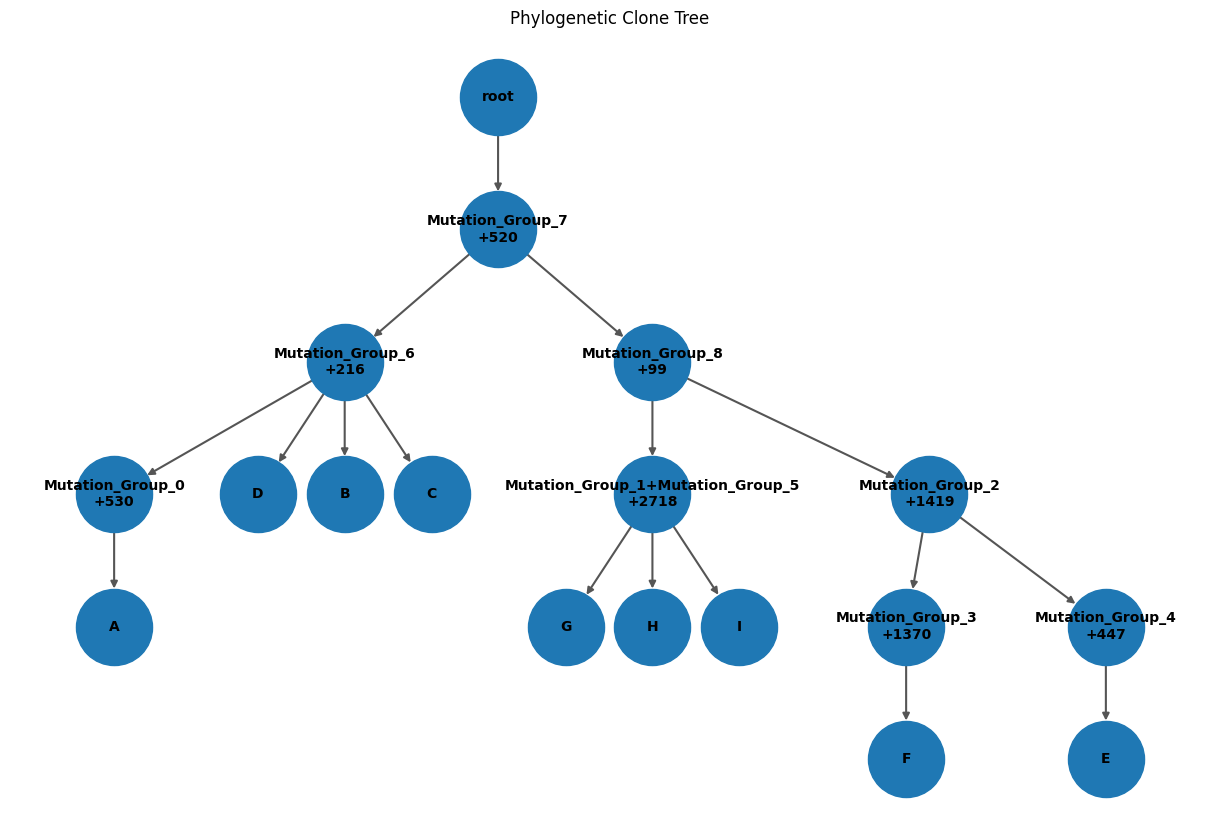

In [250]:
draw_clone_tree(T)